In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


In [ ]:
# 음수부호 표시하도록 설정
plt.rc("axes", unicode_minus = False)
""
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/캐글/주택가격예측/test.csv')
train = pd.read_csv('/content/drive/MyDrive/캐글/주택가격예측/train.csv')
sample = pd.read_csv('/content/drive/MyDrive/캐글/주택가격예측/sample_submission.csv')

In [ ]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Text(0.5, 1.0, 'train의 타겟분포')

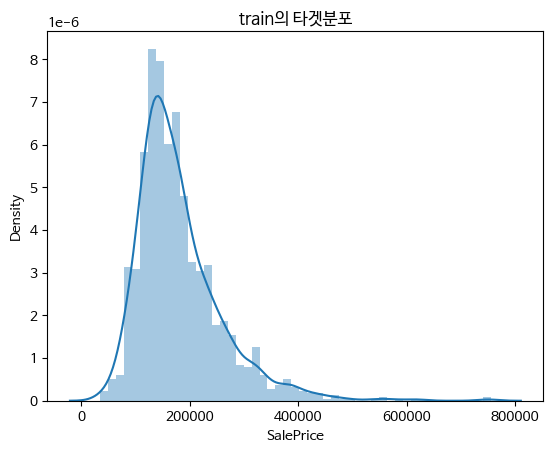

In [ ]:
# 타겟데이터의 분포 확인
sns.distplot(train['SalePrice'])
plt.title('train의 타겟분포')


<Axes: xlabel='SalePrice', ylabel='Density'>

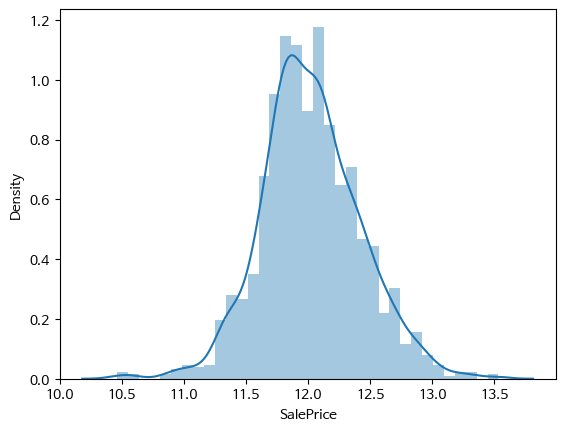

In [ ]:
 # 로그변환 통해 정규분포로 만들어주기
 train['SalePrice'] = np.log1p(train['SalePrice'])
 sns.distplot(train['SalePrice'])

In [ ]:
# 전처리를 위하여 두 데이터를 all 이라는 df로 만들어주었다.
all = pd.concat([train, test], sort=False).reset_index(drop=True)

In [ ]:
all.dtypes.head(60)

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1      float64
BsmtFinType2     object
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
Heating          object
HeatingQC        object
CentralAir      

In [ ]:
	# 1	MSSubClass: 주택의 건축 유형을 식별합니다. 숫자 코드로 주어지며, 각 코드는 특정 건축 유형을 나타냅니다.
	# 2	MSZoning: 부동산의 일반적인 분류를 나타냅니다. 각 코드는 특정 지역 구역을 나타냅니다.
	# 3	LotFrontage: 부동산과 연결된 도로의 선형 길이(피트 단위)를 나타냅니다.
	# 4	LotArea: 부동산의 대지 크기를 나타냅니다. 이 값은 평방 피트 단위로 표시됩니다.
	# 5	Street: 부동산에 대한 도로 접근 유형을 나타냅니다.
	# 6	Alley: 부동산에 대한 골목 접근 유형을 나타냅니다.
	# 7	LotShape: 부동산의 일반적인 형태를 나타냅니다.
	# 8	LandContour: 부동산의 평평함을 나타냅니다.
	# 9	Utilities: 이용 가능한 유틸리티 유형을 나타냅니다.
	# 10	LotConfig: 부동산의 대지 설정을 나타냅니다.
	# 11	LandSlope: 부동산의 경사를 나타냅니다.
	# 12	Neighborhood: 부동산이 위치한 물리적인 위치를 나타냅니다.
	# 13	Condition1 및 Condition2: 부동산의 다양한 조건에 대한 근접성을 나타냅니다.
	# 14	BldgType: 주거 유형을 나타냅니다.
	# 15	HouseStyle: 주거 유형의 스타일을 나타냅니다.
	# 16	OverallQual 및 OverallCond: 주택의 전체적인 품질 및 상태를 평가합니다.
	# 17	YearBuilt 및 YearRemodAdd: 주택의 원래 건설 날짜와 리모델링 날짜를 나타냅니다.
	# 18	RoofStyle 및 RoofMatl: 지붕의 유형과 재료를 나타냅니다.
	# 19	Exterior1st 및 Exterior2nd: 주택의 외장재를 나타냅니다.
	# 20	MasVnrType 및 MasVnrArea: 석조 베니어 유형과 면적을 나타냅니다.
	# 21	ExterQual 및 ExterCond: 외부 소재의 품질과 상태를 평가합니다.
	# 22	Foundation: 건축물의 기초 유형을 나타냅니다.
	# 23	BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2: 지하실의 높이, 일반 상태, 외부 노출, 마감된 공간 및 지하실 유형을 나타냅니다.
	# 24	BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF: 지하실 면적을 나타냅니다.
	# 25	Heating 및 HeatingQC: 난방 시스템과 난방 품질을 나타냅니다.
	# 26	CentralAir: 중앙 에어컨 시스템의 유무를 나타냅니다.
	# 27	Electrical: 전기 시스템을 나타냅니다.
	# 28	1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea: 주거 공간의 크기를 나타냅니다.
	# 29	BsmtFullBath, BsmtHalfBath, FullBath, HalfBath: 욕실의 수를 나타냅니다.
	# 30	BedroomAbvGr, KitchenAbvGr: 침실과 주방의 수를 나타냅니다.
	# 31	KitchenQual: 주방의 품질을 나타냅니다.
	# 32	TotRmsAbvGrd: 전체 방의 수를 나타냅니다.
	# 33	Functional: 집의 기능성을 나타냅니다.
	# 34	Fireplaces 및 FireplaceQu: 벽난로의 수와 품질을 나타냅니다.
	# 35	GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond: 차고에 관련된 정보를 나타냅니다.
	# 36	PavedDrive: 포장된 차도의 유무를 나타냅니다.
	# 37	WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch: 부동산의 다양한 형태의 현관과 데크 면적을 나타냅니다.
	# 38	PoolArea 및 PoolQC: 수영장의 크기와 품질을 나타냅니다.
	# 39	Fence: 울타리의 품질을 나타냅니다.
	# 40	MiscFeature 및 MiscVal: 기타 특징과 해당 값의 가치를 나타냅니다.
	# 41	MoSold 및 YrSold: 판매가 이루어진 월과 년도를 나타냅니다.
	# 42	SaleType 및 SaleCondition: 판매 유형과 판매 상태를 나타냅니다.

In [ ]:
# int형과 obj형의 데이터별로 전처리하기위해 분리해주었다.
int_cols = all.select_dtypes(include=['int64','float64'])
obj_cols = all.select_dtypes(include=['object'])


In [ ]:
all.info() # 81개컬럼이 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [ ]:
# int데이터의 결측치 확인
int_cols.isna().sum()

Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

#결측치 제거


(0.0, 30000.0)

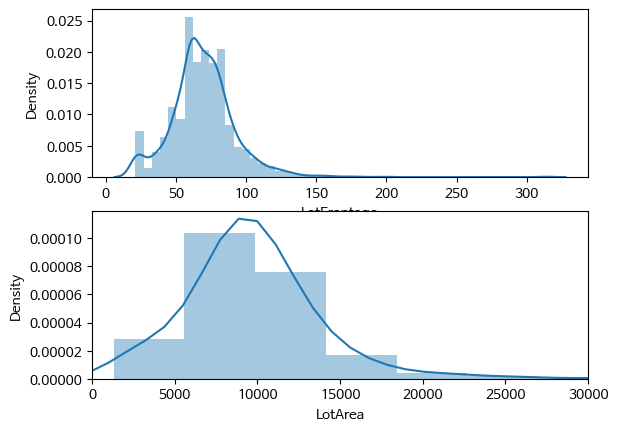

In [ ]:
# 3	LotFrontage: 부동산과 연결된 도로의 선형 길이(피트 단위)를 나타냅니다.
# 4	LotArea: 부동산의 대지 크기를 나타냅니다. 이 값은 평방 피트 단위로 표시됩니다.

# LotFrontage와 LotArea간 상관관계가 있을것이라고 예상하였다.
fig, ax = plt.subplots(2,1)
sns.distplot(int_cols['LotFrontage'],ax=ax[0])
sns.distplot(int_cols['LotArea'], ax= ax[1])
ax[1].set_xlim([0,30000])

<Axes: xlabel='LotArea', ylabel='LotFrontage'>

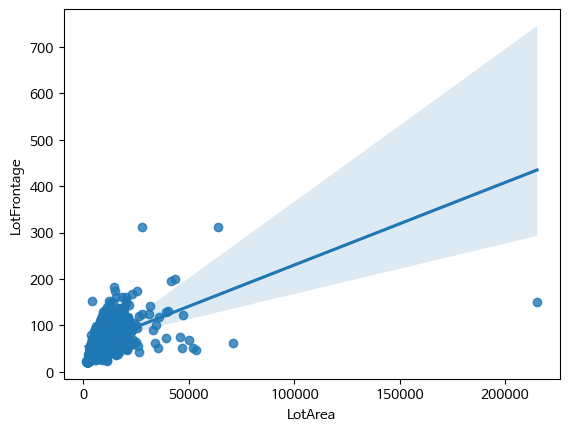

In [ ]:
# 회귀선을 직접 그려본 결과 어느정도 상관관계가 존재하고, 실제 데이터를 보았을 때도 비례하는 것을 볼 수 있었다.
sns.regplot(x=int_cols['LotArea'], y=int_cols['LotFrontage'])

<Axes: >

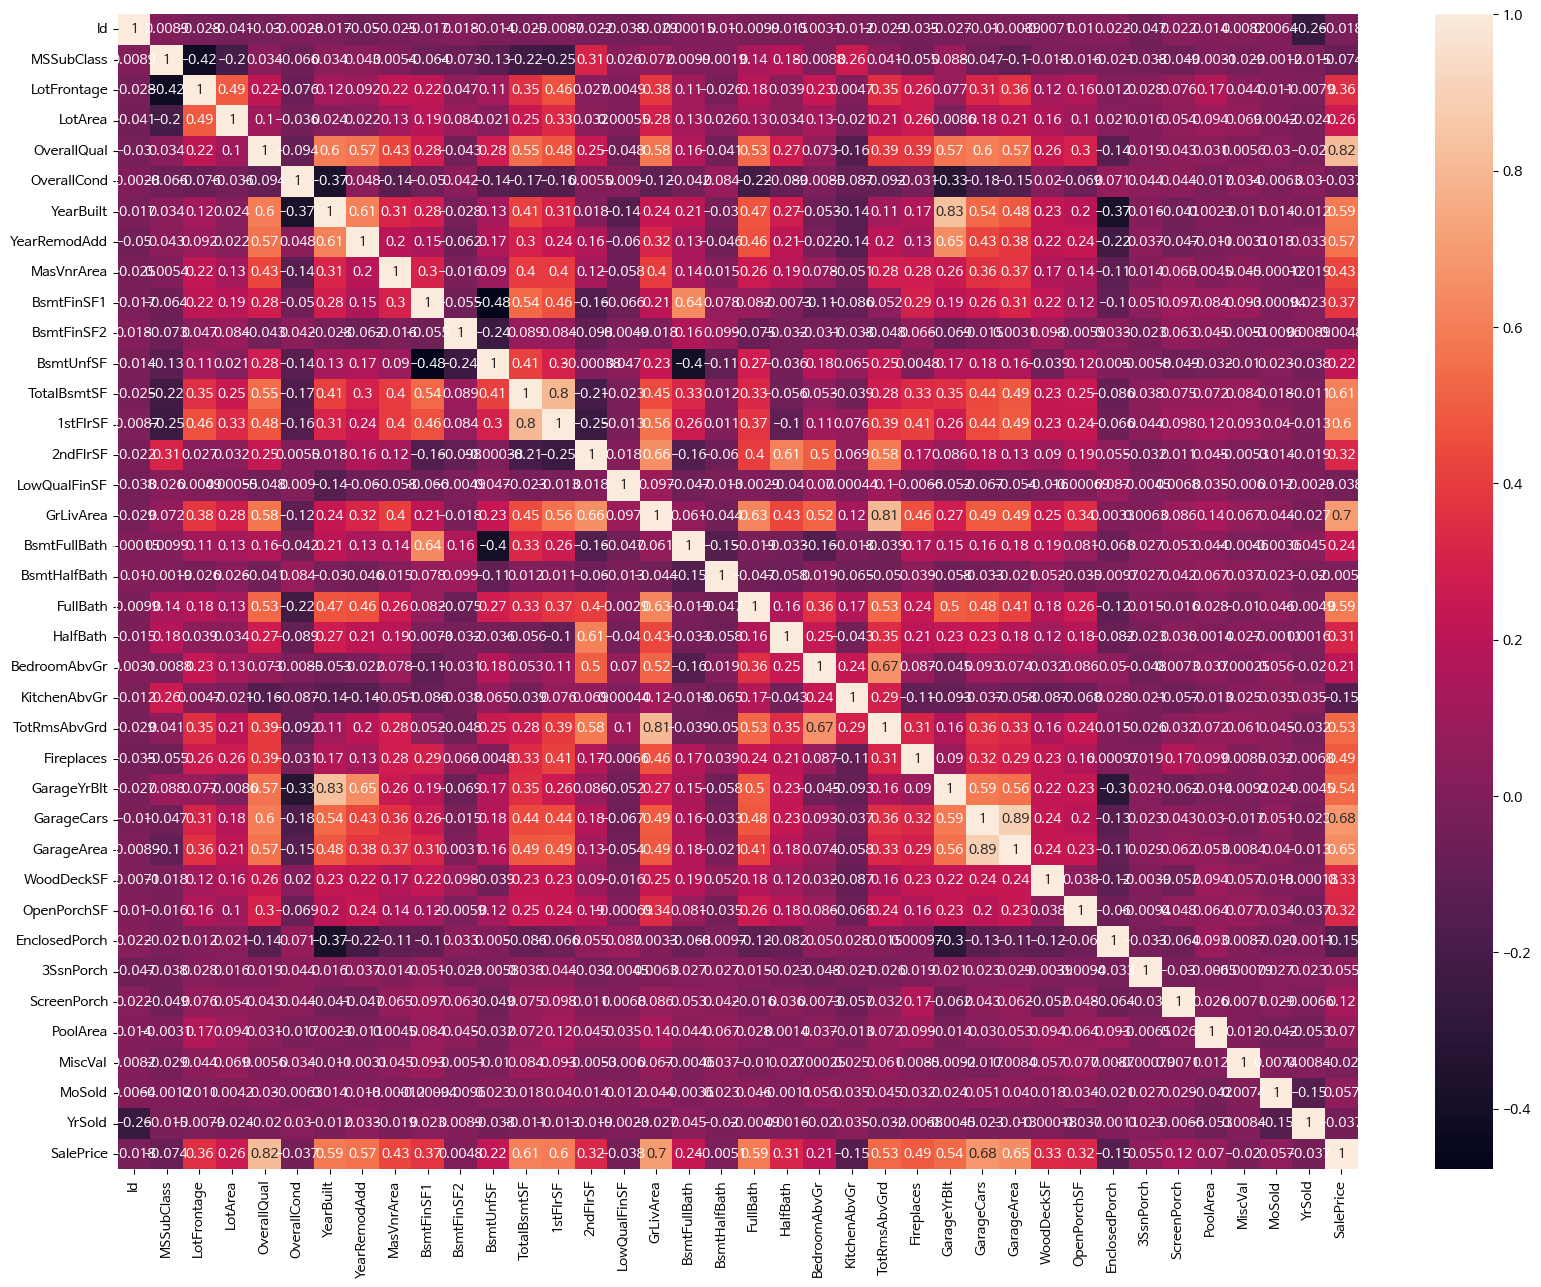

In [ ]:
# LotFrontage와 LotArea의 상관계수값은 0.49로 두 변수는 상관성이 존재한다.
plt.figure(figsize=(20,15))
sns.heatmap(int_cols.corr(), annot=True)

In [ ]:
# LotFrontage와 LotArea는 비례하는 경향성이 있었다. 따라서, LotArea로 sort한 뒤, ffill처리하여 결측치를 채웠다.
all.sort_values(by='LotArea',inplace=True)
all['LotFrontage'].fillna(method='ffill',inplace=True)
all.sort_values(by='Id', inplace=True)

# 나머지 Int컬럼 0처리 데이터의 설명서에 따라 결측치는 해당 값이 없는 것으로 0 처리를 해주면 되었다.
all["MasVnrArea"] = all["MasVnrArea"].fillna(0)
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'GarageCars', 'GarageArea',
            'BsmtFullBath', 'BsmtHalfBath', 'GarageArea','GarageYrBlt']:
            all[col].fillna(0, inplace=True)

# -----------------------------------------------------------------------------------

# obj 결측치 처리
all['MSZoning'] = all['MSZoning'].fillna(all['MSZoning'].mode()[0])
all['Alley'].fillna(0,inplace=True)
all['Utilities'] = all['Utilities'].fillna(all['Utilities'].mode()[0])
all['Exterior1st'] = all['Exterior1st'].fillna(all['Exterior1st'].mode()[0])
all['Exterior2nd'] = all['Exterior2nd'].fillna(all['Exterior2nd'].mode()[0])
all['MasVnrType'] = all['MasVnrType'].fillna('None')

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
  all[col].fillna('None', inplace=True)

all['Electrical'].fillna(all['Electrical'].mode()[0], inplace=True)
all['KitchenQual'].fillna(all['KitchenQual'].mode()[0], inplace=True)
all['Functional'].fillna(all['Functional'].mode()[0], inplace=True)

for col in ['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC', 'Fence', 'MiscFeature']:
  all[col].fillna('None', inplace=True)

all['SaleType'].fillna(all['SaleType'].mode()[0],inplace=True)

In [ ]:
pd.set_option('display.max_rows', 100)  # 모든 행 표시
pd.set_option('display.max_columns', None)

In [ ]:
# 타겟값을 제외하고 모든 결측치가 사라졌다.
all.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# int형 데이터들 중 상관계수 값이 높은 피처 선정

In [ ]:
# 상관계수 0.3 이하는 피처로 사용하지 않음
# 0.3 이상 값을 가지는 컬럼만 따로 high_corr에 넣어주었다.
corr = int_cols.corr()
high_corr = corr[corr['SalePrice'] >= 0.3].index
high_corr

# hig_corr에서 타겟컬럼(SalePrice)을 제외한 컬럼들만 모아두었다.
high_corr_test = ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


<Axes: >

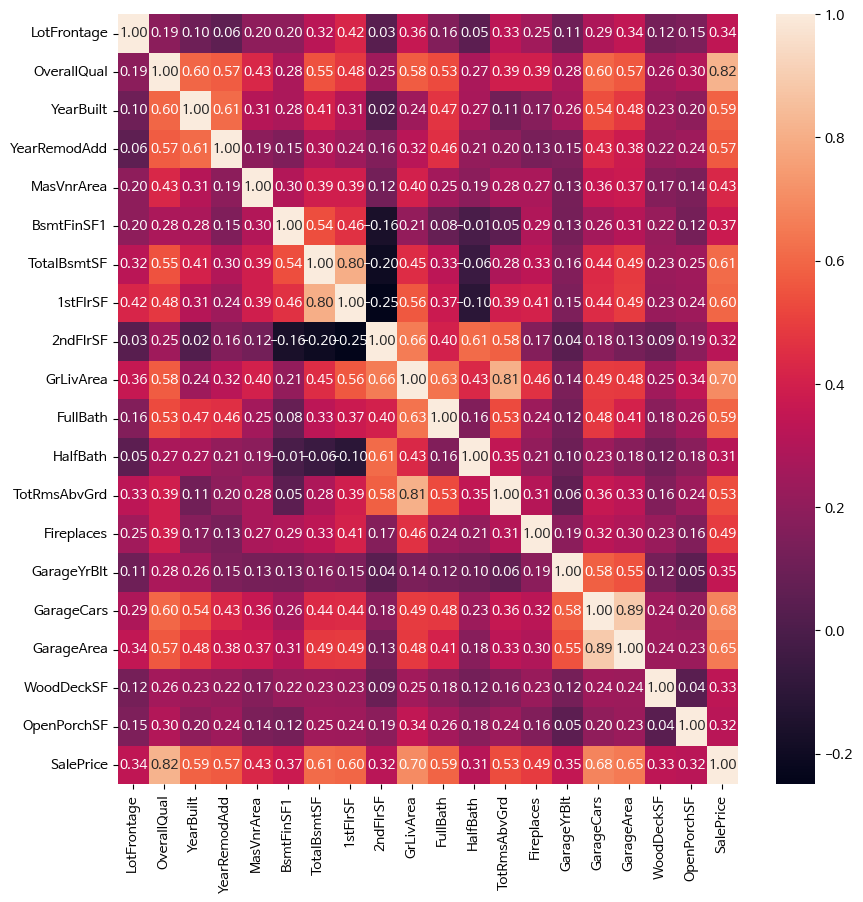

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(all[high_corr].corr(), annot=True, fmt='.2f')

<Axes: >

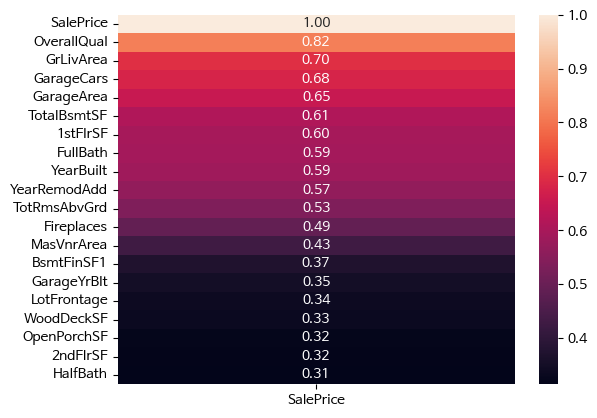

In [ ]:
# SalePrice와 상관관계가 높은 변수들을 보았다.
y_corr=all[high_corr].corr()
corr = y_corr[['SalePrice']].sort_values(by='SalePrice', ascending=False)


sns.heatmap(corr,annot=True, fmt='.2f')

# OverallQual = 전체적인 주택 퀄리티
# GrLivArea = 주거 공간의 크기
# GarageARea = 차고의 크기
# GarageCars = 차고가 수용할 수 있는 차의 수
# TotalBsmtSF = 지하창고의 크기

# 상관분석을 했을 때, 기본적 상식선에서 생각할 수 있는 요소(주택퀄리티, 차고의 크기 등)들이 크거나 많을 경우, 주택가격이 올라가는 추세를 보였다.

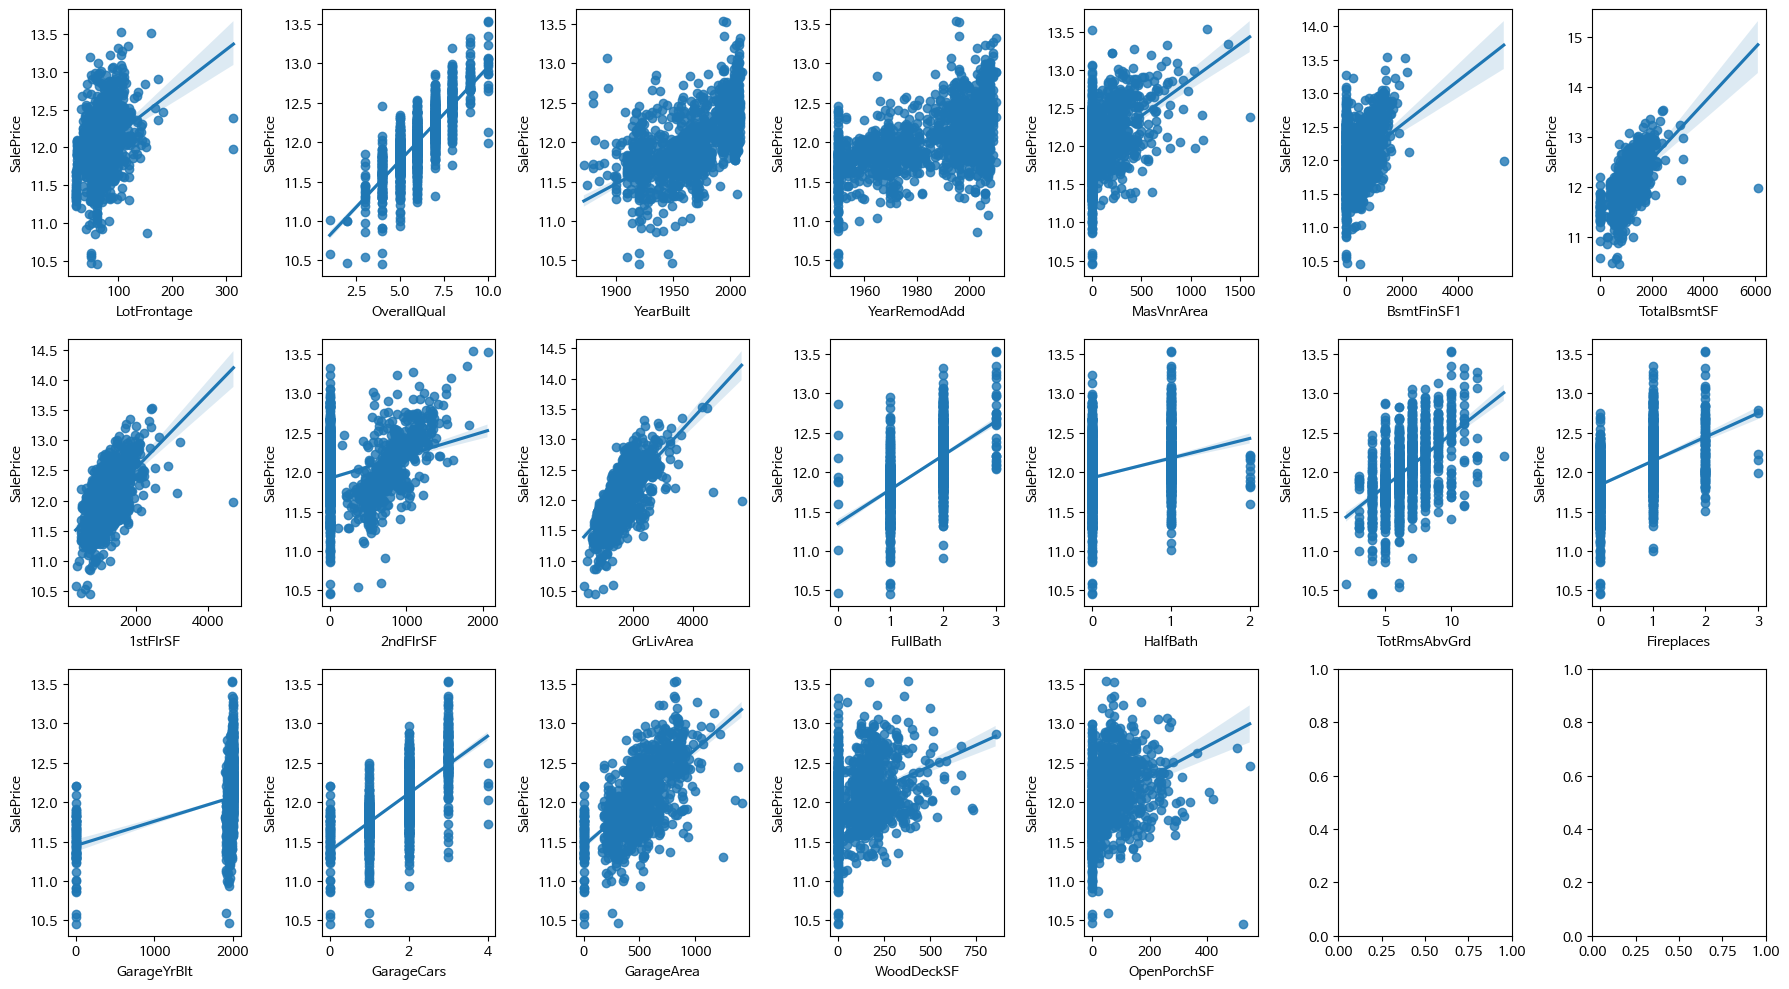

In [ ]:
# 상관계수가 0.3이상인 변수들의 그래프를 보았을때도, 변수들과 주택가격간의 비례의 관계를 보인다고 볼 수 있었다.
idx = high_corr

fig, ax = plt.subplots(3,7, figsize=(18,10))

for i in range(19):
  sns.regplot(x=all[idx[i]], y=all['SalePrice'], ax= ax [i//7, i %7])

plt.tight_layout()

#범주형데이터처리하기

## 범주형데이터 분산분석하기

In [ ]:
# train 데이터 중 obj 형태의 컬럼들만 추출했다.
obj = all.loc[0:1459]
obj_cols = obj.select_dtypes(include=['object']) # obj 컬럼 추출
obj_cols['SalePrice'] = obj['SalePrice']

# object 컬럼들과 y값인 SalePrice만 있는 df 생성
obj_cols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,12.247699
1,RL,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,12.109016
2,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,12.317171
3,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml,11.849405
4,RL,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,12.072547
1456,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal,12.254868
1457,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal,12.493133
1458,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal,11.864469


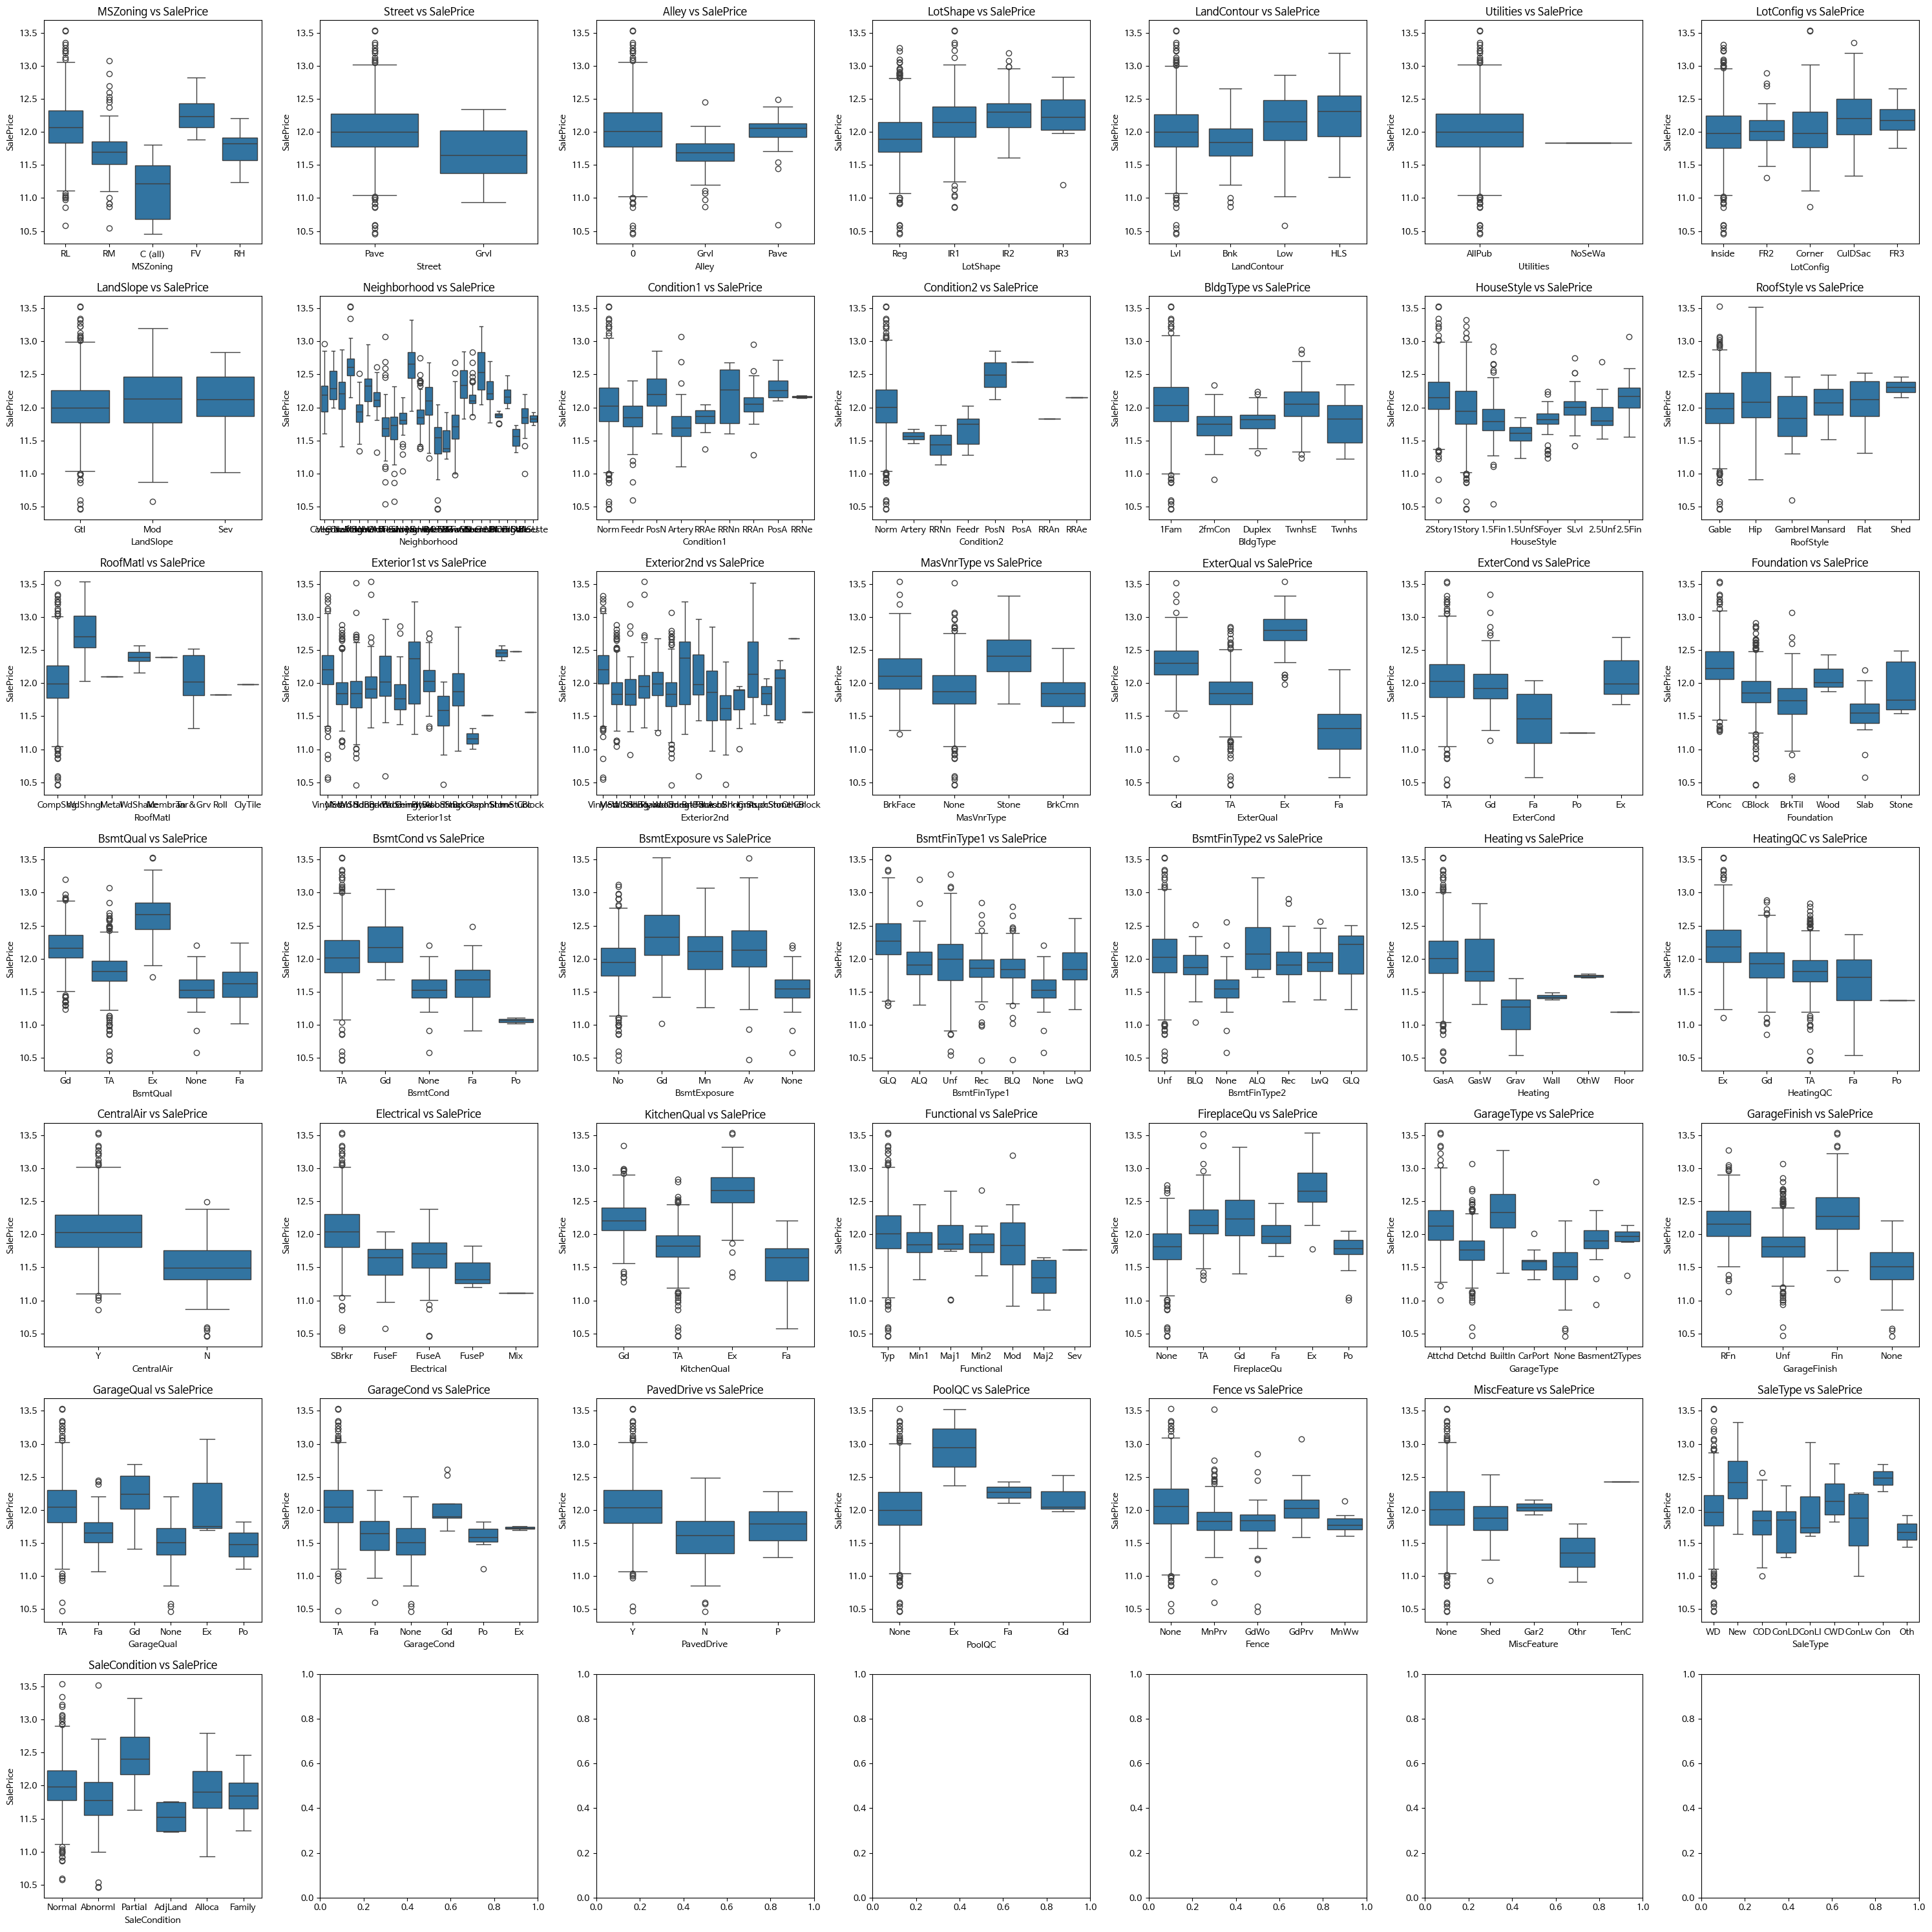

In [ ]:
# obj 컬럼과 타겟값임 SalePrice 간의 boxplot
# 단순 boxplot으로 타겟값과 상관도가 높은걸 파악하기엔 어려움이 있다.
cols = obj_cols.columns


fig, ax = plt.subplots(7, 7, figsize=(30, 30))

for i in range(43):
    sns.boxplot(x=cols[i], y='SalePrice', data=all, ax=ax[i//7, i%7])
    ax[i//7, i%7].set_title(f'{cols[i]} vs SalePrice')

plt.tight_layout()
plt.show()


In [ ]:
# 아노바분석을 통한 obj데이터처리
from statsmodels.formula.api import ols  # statsmodels는 통계 모델을 만들고 ANOVA 분석을 수행하는 데 사용
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

# c 리스트에 범주형 변수를 넣음
c = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

data_subset = obj_cols[['SalePrice'] + c]  #

# ANOVA 모델 생성
model = ols('SalePrice ~ ' + ' + '.join(c), data=data_subset).fit()

# ols 함수 형식
# ols(formula, data)
# formula: 종속 변수와 독립 변수의 관계를 나타내는 문자열.
# data: 회귀 분석을 수행할 데이터프레임.

# ols('SalePrice ~ ' + ' + '.join(c), data=data_subset)
# ols(): 선형 회귀 모델을 생성
# 'SalePrice ~ ' + ' + '.join(c): 회귀식(formula) 문자열을 생성
# 'SalePrice ~ '는 종속 변수가 SalePrice를 의미
# ' + '.join(c)는 리스트 c에 있는 모든 변수를 + 기호로 연결하여 독립 변수로 사용

# 예를 들어, c가 ['MSZoning', 'Street']라면, formula는 'SalePrice ~ MSZoning + Street'
# data=data_subset: 회귀 분석을 수행할 데이터프레임을 지정합니다.




anova_table = sm.stats.anova_lm(model, typ=2) # anova_lm 통해서 분산분석 시행 model은 위에서 만든 회귀식
anova_table= pd.DataFrame(anova_table)
anova_table['F'] = round(anova_table['F'],3)
anova_table['PR(>F)'] = round(anova_table['PR(>F)'],5) # 회귀식을 통해 F값과 PR(>F)값 (p-value 값) 추출
anova_table



,sum_sq,df,F,PR(>F)
MSZoning,1.629796,4.0,17.636,0.00000
Street,0.002726,1.0,0.118,0.73126
Alley,0.194450,2.0,4.208,0.01508
LotShape,0.115779,3.0,1.670,0.17155
LandContour,0.053492,3.0,0.772,0.50981
Utilities,0.093534,1.0,4.049,0.04442
LotConfig,0.580815,4.0,6.285,0.00005
LandSlope,0.040998,2.0,0.887,0.41203
Neighborhood,5.963704,24.0,10.756,0.00000
Condition1,0.556663,8.0,3.012,0.00236


In [ ]:
a= anova_table['PR(>F)']< 0.05

anova_table_good = anova_table[a]
anova_table_good.sort_values(by='PR(>F)', ascending=True)

# p-value(PR>F)가 0.05 미만인 값들만 추출
# 종속변수에 영향이 있다고 볼 수 있는 변수들.

,sum_sq,df,F,PR(>F)
MSZoning,1.629796,4.0,17.636,0.00000
BsmtQual,0.951385,4.0,10.295,0.00000
Heating,1.003042,5.0,8.683,0.00000
CentralAir,0.585058,1.0,25.324,0.00000
Exterior1st,1.208081,14.0,3.735,0.00000
RoofMatl,1.106276,7.0,6.841,0.00000
KitchenQual,1.420138,3.0,20.490,0.00000
BsmtExposure,1.211015,4.0,13.105,0.00000
HouseStyle,3.167319,7.0,19.585,0.00000
Neighborhood,5.963704,24.0,10.756,0.00000


In [ ]:

# # 모델로부터 잔차 계산
# residuals = model.resid
# residuals


# # 히스토그램
# plt.figure(figsize=(10, 5))
# sns.histplot(residuals, kde=True, color='blue', bins=20)
# plt.title('잔차분포')
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')
# plt.show()

# # QQ plot
# plt.figure(figsize=(10, 5))
# stats.probplot(residuals, dist="norm", plot=plt)
# plt.title('QQ Plot of Residuals')
# plt.xlabel('Theoretical Quantiles')
# plt.ylabel('Sample Quantiles')
# plt.show()

In [ ]:
# 이제 train_X 에 유의하다고 여겨지는 obj 변수들을 넣고,
obj_good_idx=anova_table_good.index
obj_good_idx

Index(['MSZoning', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [ ]:
# 상관계수값이 0.3이상인 int형 변수들을 넣어주었다.
final_col = high_corr.append(obj_good_idx)
final_col

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'MSZoning', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [ ]:
real_final = all[final_col]
train_y = train['SalePrice']
real_final.drop('SalePrice', axis =1 , inplace=True)

In [ ]:
# 명목형 변수들이 순서가 없는 데이터이므로 원핫 인코딩을 통해 0,1 로 표현해주었다.
real_final = pd.get_dummies(real_final)

In [ ]:
# 전처리를 위해 합쳤던 all 데이터를 다시 train_X / test_X로 분리해주었다.
train_X = real_final.loc[0:1459]
test_X = real_final.loc[1460:]



In [ ]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)

(1460, 213)
(1460,)
(1459, 213)


In [ ]:
print(test.shape)
print(train.shape)

(1459, 80)
(1460, 81)


In [ ]:
print(test_X.shape)
print(train_X.shape)

(1459, 213)
(1460, 213)


# 선형회귀

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_X, train_y)
# test데이터의 y값이 존재하지 않아 train_X를 train과 valid세트로 나누어 주었다.


lr = LinearRegression()
lr.fit(train_input, train_target)
lr.fit(val_input, val_target)

print(lr.score(train_input, train_target))
print(lr.score(val_input,val_target))

# 단순 회귀분석을 썼을때 점수가 만족스럽진 않다

0.7930846004935271
0.9529556555295658


## kfold 진행했을경우


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_validate
scores = cross_validate(lr, train_X, train_y, cv=5, return_train_score=True)
print(scores['train_score'].mean())
print(scores['test_score'].mean())

# 점수가 좀 올랐다. 그래도 조금 부족하다고 느껴진다.

0.937349238925157
0.8498896408222049


#랜덤포레스트





In [ ]:
# kfold 5번 + 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
scores = cross_validate(rf, train_X, train_y, return_train_score=True, n_jobs=-1)

print('train score:',scores['train_score'].mean())
print('test score:',scores['test_score'].mean())

# 랜덤포레스트 + kfold를 통해서 점수가 점점 나아지는 모습을 보인다.

train score: 0.9805382169509149
test score: 0.8659649490129079


In [ ]:
# # 그리드서치 + 랜덤포레스트를 수행하려 했으나. 너무 오래걸려서 수행하지 못했다.

# param_grid = {
#     'max_depth': [3,5,7,10],
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_features': [10, 20, 30 , 40],
#     'min_samples_leaf': [1, 2, 4]
# }


# rf = RandomForestRegressor()
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1,verbose=)


# grid_search.fit(train_X, train_y)


# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

#LGBMRegressor

In [ ]:
# 부스팅 모델중 LGBM회귀 사용
# LGBM + kfold 5번 진행
# 점수가 많이 좋아졌지만, 과대적합이라고 볼 수 있다.
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
scores = cross_validate(lgbm, train_X, train_y, return_train_score=True, n_jobs=-1, cv=5)


print('Train score:', scores['train_score'].mean())
print('Test score:', scores['test_score'].mean())


Train score: 0.9846395616458116
Test score: 0.8808528607829162


#XGboostRegrssor

In [ ]:
# 부스팅 모델중 XGboost회귀 사용
# XGboost + kfold 5번 진행
# train의 경우 99퍼센트의 확률을 보여주지만, 과대적합이 일어나고 있다.
from xgboost import XGBRegressor
xg= XGBRegressor()

scores = cross_validate(xg, train_X, train_y, return_train_score=True, n_jobs=-1, cv=5)


print('Train score:', scores['train_score'].mean())
print('Test score:', scores['test_score'].mean())

Train score: 0.9994599664356937
Test score: 0.8639872458590263


# 그리드서치 라쏘

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
ls = Lasso()
params = {
    'alpha': [0,0.01, 0.1, 1, 10, 20, 30, 40, 100]
}

gs = GridSearchCV(ls, params, cv=5)
gs.fit(train_X, train_y)


print(gs.best_params_)
print(gs.score(train_X, train_y))
# 최적 알파 0

{'alpha': 0}
0.9330638075634059


In [ ]:
# 라쏘회귀+ kfold 5번은 점수가 많이 부족하다.
ls = Lasso(alpha=0)
scores = cross_validate(ls, train_X, train_y, return_train_score=True, n_jobs=-1, cv=5)


print('Train score:', scores['train_score'].mean())
print('Test score:', scores['test_score'].mean())

Train score: 0.9372242924233989
Test score: 0.8513644660822285


# 최종 모델 3가지


## 랜덤포레스트 + 랜덤서치

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# 랜덤포레스트 모델 생성
rf = RandomForestRegressor()

# 탐색할 하이퍼파라미터 공간 설정
param_dist = {
    'n_estimators': sp_randint(6, 50),  # 트리의 개수 = 6 ~49
    'max_features': ['auto', 'sqrt'],       # 분할에 사용할 특성의 최대 개수 = auto(모든피처고려) sqrt(피처의제곱근만큼고려)
    'max_depth': [None] + list(range(5, 30, 5)),  # 트리의 최대 깊이   = [None, 5, 10, 15, 20, 25]
    'min_samples_split': sp_randint(2, 20),       # 내부 노드를 분할하기 위한 최소 샘플 수. =  2~20
    'min_samples_leaf': sp_randint(1, 20),        # 잎 노드에 있어야 하는 최소 샘플 수. = 1~20
    'bootstrap': [True, False]                    # 트리를 구성할 때 부트스트랩 샘플링 사용 여부 True = 무작위 중복 허용 / false = 중복추출 불허
}

# 랜덤포레스트 모델에 대한 랜덤 서치 수행 후 최적의 하이퍼파라미터값을 추출했다,
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)
random_search.fit(train_input, train_target)


# 최적의 하이퍼파라미터와 점수 출력
print("하이퍼파라미터: ", random_search.best_params_)
print('best_score', random_search.best_score_)

하이퍼파라미터:  {'bootstrap': False, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 49}
best_score 0.8586726465650925


In [ ]:
print('train_score:', random_search.score(train_input,train_target))
print('valid_score:', random_search.score(val_input,val_target))

mse = mean_squared_error(train_target, random_search.predict(train_input))
print('rmse:', np.sqrt(mse))

train_score: 0.9890681193557269
valid_score: 0.8720149725293243
rmse: 0.041656264413992096


In [ ]:
# 랜덤포레스트로 랜덤서치를 여러번 진행할경우
# train_score = 0.95 ~ 0.99의 값이 나오고
# Test_score = 0.85 ~ 0.87 정도의 값이 나왔다.
# 밑의 파라미터값은 랜덤포레스트 + 랜덤서치를 여러번 돌렸을 때 , 가장 효과적인 파라미터 값이다.
param_dist= {'bootstrap': False,
              'max_depth': 25,
              'max_features': 'sqrt',
              'min_samples_leaf': 1,
              'min_samples_split': 6,
              'n_estimators': 49}

rf = RandomForestRegressor(**random_search.best_params_)
rf.fit(train_input,train_target)

print('train_score:', rf.score(train_input,train_target))
print('valid_score:', rf.score(val_input,val_target))

mse = mean_squared_error(train_target, rf.predict(train_input))
print('rmse:', np.sqrt(mse)) # 오차값도 0.042이다.
# 상당히 높은 점수가 나왔다.

# train_score: 0.98849583999159
# valid_score: 0.8736182350550173
# rmse: 0.0427327003503504

train_score: 0.98849583999159
valid_score: 0.8736182350550173
rmse: 0.0427327003503504


## LGBM + 랜덤서치

In [ ]:

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

param_dist = {
    'num_leaves': sp_randint(6, 50) ## 각 트리의 최대 리프 노드 개수 (6에서 49까지의 무작위 정수 선택)
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # 학습률 (사용할 수 있는 고정된 값들)
    'n_estimators': sp_randint(50, 500), # 부스팅 트리의 개수 (50에서 499까지의 무작위 정수 선택)
    'max_depth': sp_randint(3, 15),  # 각 트리의 최대 깊이 (3에서 14까지의 무작위 정수 선택)
    'min_child_samples': sp_randint(2, 50), # 리프 노드에 필요한 최소 샘플 수 (2에서 49까지의 무작위 정수 선택)
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], #  # 각 트리를 학습시킬 때 사용할 데이터 샘플링 비율 (사용 가능한 고정된 값들)
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], #  각 트리를 학습시킬 때 사용할 피처 샘플링 비율 (사용 가능한 고정된 값들)
    'reg_alpha': [0, 0.1, 0.5, 1.0], # L1 정규화 항의 계수 (사용할 수 있는 고정된 값들)
    'reg_lambda': [0, 0.1, 0.5, 1.0] # L2 정규화 항의 계수 (사용할 수 있는 고정된 값들)
}



# 랜덤 서치 수행 (소요시간 5분)
random_search_lgbm = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist, n_iter=200, cv=5)
random_search_lgbm.fit(train_input, train_target)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=200,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4f8013dd80>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4f801598d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4f80159bd0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4f8013d8d0>,
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]})

In [ ]:
# 최적의 하이퍼파라미터와 점수 출력
print("하이퍼파라미터: ", random_search_lgbm.best_params_)
print('best_score', random_search_lgbm.best_score_)
print()

# 점수 출력
print('train_score:', random_search_lgbm.score(train_input,train_target))
print('valid_score:', random_search_lgbm.score(val_input,val_target))

# 오차출력
mse = mean_squared_error(train_target, random_search_lgbm.predict(train_input))
print('rmse:', np.sqrt(mse))

# {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_samples': 25, 'n_estimators': 396, 'num_leaves': 8, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 0.7}
# train 0.98 /// valid = 0.87 // 오차 = 0.0554
# 랜덤포레스트가 미세하게 더 높은 점수를 보임

하이퍼파라미터:  {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_samples': 25, 'n_estimators': 396, 'num_leaves': 8, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 0.7}
best_score 0.8922660066168386

train_score: 0.9806119748365789
valid_score: 0.8719741767015268
rmse: 0.05547530109252819


## XGBoost + 랜덤서치

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb= XGBRegressor()

xgb_param_grid={
    'n_estimators' : [100,200,300,400,500], # 학습률 (고정된 값들)
    'learning_rate' : [0.01,0.05,0.1,0.15], # 각 트리의 최대 깊이 (고정된 값들)
    'max_depth' : [3,5,7,10,15], # 트리가 추가 분할되는데 필요한 최소 손실 감소 (고정된 값들)
    'gamma' : [0,1,2,3],  # 트리가 추가 분할되는데 필요한 최소 손실 감소 (고정된 값들)
    'colsample_bytree' : [0.8,0.9]} # 각 트리를 학습시킬 때 사용할 피처 샘플링 비율 (고정된 값들)

# 랜덤 서치 수행 (소요시간 5분)
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_iter=100, cv=5)
random_search_xgb.fit(train_input, train_target)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.8, 0.9],
                                        'gamma': [0, 1, 2, 3],
                                        'learning_rate': [0.01, 0.05, 0.1,
                                                          0.15],
                                        'max_depth': [3, 5, 7, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [ ]:
# 최적의 하이퍼파라미터와 점수 출력
# 10여분 소요!
print("하이퍼파라미터: ", random_search_xgb.best_params_)
print('best_score', random_search_xgb.best_score_)
print()

# 점수 출력
print('train_score:', random_search_xgb.score(train_input,train_target))
print('valid_score:', random_search_xgb.score(val_input,val_target))

# 오차출력
mse = mean_squared_error(train_target, random_search_xgb.predict(train_input))
print('rmse:', np.sqrt(mse))


# 하이퍼파라미터:  {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.8}
# best_score 0.8866793724164618

# train_score: 0.9780843953986916
# valid_score: 0.8777576005502705
# rmse: 0.05898065739461051

하이퍼파라미터:  {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.8}
best_score 0.8866793724164618

train_score: 0.9780843953986916
valid_score: 0.8777576005502705
rmse: 0.05898065739461051




1.  RandomForest
 - train_score: 0.98849
 - valid_score: 0.87361
 - rmse: 0.04273
2.  LGBM
 - train_score: 0.98061
 - valid_score: 0.87197
 - rmse: 0.05547
3. XGboost
 - train_score: 0.97808
 - valid_score: 0.87775
 - rmse: 0.05898

**-> 랜덤포레스트의 오차가 가장 적다.**



# 실제 test data를 예측한 뒤 캐글에 제출해 등수 보기

In [ ]:
# 아까 랜덤서치로 찾은 파라미터를 넣어준 뒤 fit했다.
rf= RandomForestRegressor(**random_search.best_params_)
rf.fit(train_X, train_y)
print('train_score:',rf.score(train_X,train_y))
mse = mean_squared_error(train_target,rf.predict(train_input))
print('rmse:', np.sqrt(mse))



train_score: 0.9884907267048518
rmse: 0.04106465662190865


In [ ]:
pred = pd.DataFrame({'Id':test['Id'],
                     'SalePrice':np.expm1(rf.predict(test_X))}) # 처음에 정규분포화 시켜주기 위해 로그를 취한것을 풀어주었다.

In [ ]:
pred

,Id,SalePrice
0,1461,123951.389847
1,1462,148646.352390
2,1463,178098.380735
3,1464,189945.612869
4,1465,186225.168300
...,...,...
1454,2915,84165.020354
1455,2916,85150.048922
1456,2917,156489.133151
1457,2918,106063.929250


In [ ]:
pred.to_csv('pred_real_rf.csv',index=False)

실제 캐글의 제출한 결과
4752명 중 1884등을 차지하여 대략 상위 39%의 등수를 보여주었다.

1.   4752명 중 1884등을 차지하여 대략 상위 39%의 등수를 보여주었다
2.   실제 테스트 세트의 rmse는 0.14787이었다
3.   캐글 대회 상위권의 오차점수는 0.00044, 0.05947처럼 예측과 실제 값이 거의 모두 일치하는 모델들이 많았다.
4.   변수 선택시 이상치를 제거하거나, 변수 각각에 스케일링을 진행하고, 혹은 파생변수를 직접 만드는과정 등이 추가로 진행된다면 아마 더 높은 정확도가 나올 것이라고 생각이 든다.
5. 부스팅 모델에 대한 완전한 이해를 바탕으로 하이퍼 파라미터를 선정한 것이 아니어서 정확도가 떨어지는 측면도 있을 것같다. 모델의 원리를 깊게 이해하고 하이퍼파라미터를 선정하면 더 나은 결과가 있을 것이라고 생각이 든다.

